In [1]:
# do all the import stuff
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
from scipy import signal
import numpy as np
import math
# import my modules
import sys
import cv2
sys.path.append('/home/julian/dev/computer_vision_ws2015/')
import juvis as jv

# Lucas-Kanade

In [2]:
# load the video
BeeDanceVid = jv.load_video_as_mat('beedance.avi')

In [3]:
# load csv
Corners = np.loadtxt(open('corners.cvs', 'rb'),delimiter=',')
x = Corners[:,0]
y = Corners[:,1]

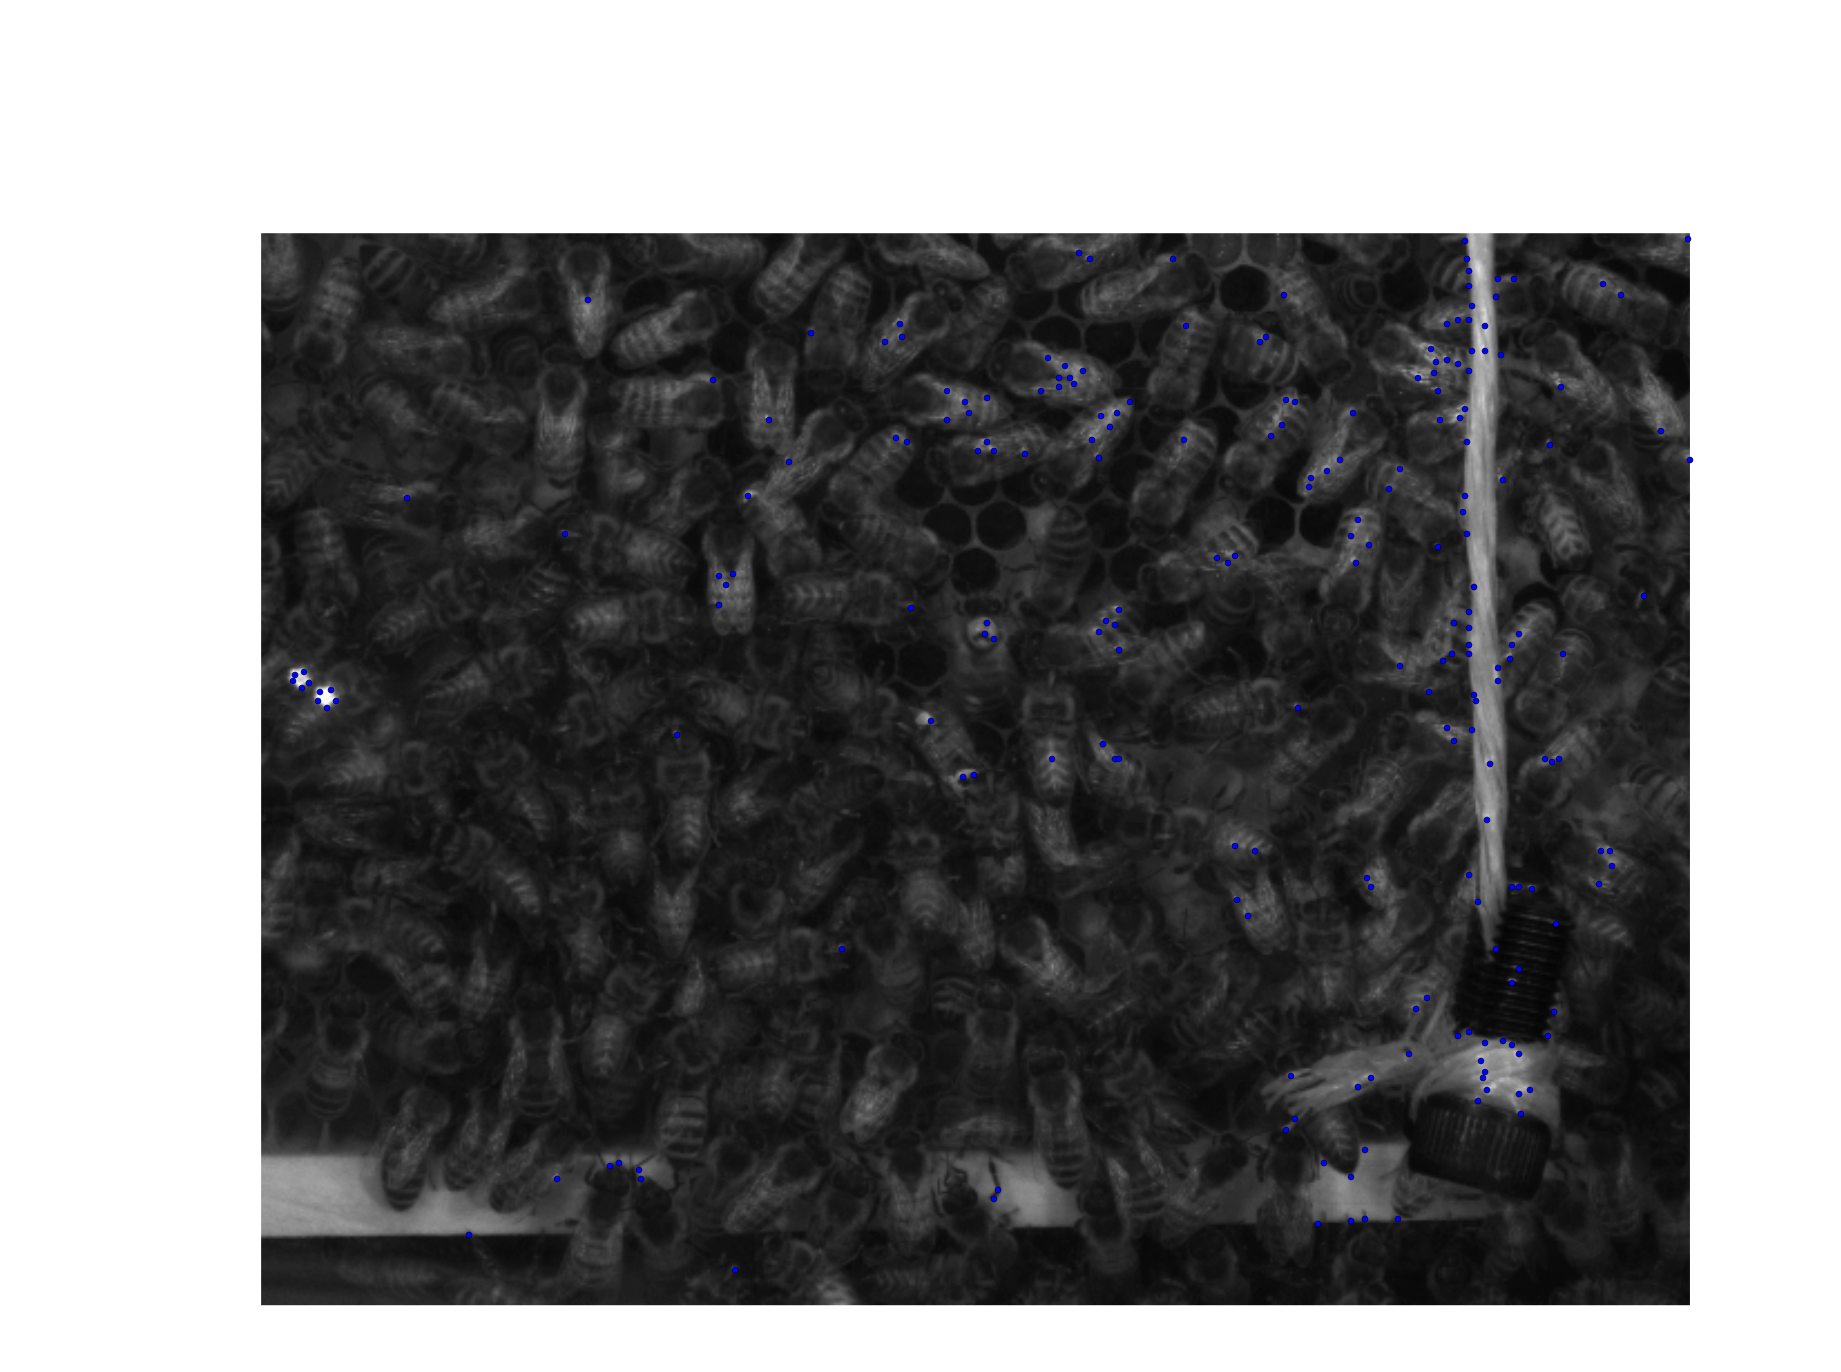

In [4]:
A = BeeDanceVid[0]
fig, ax = plt.subplots(1,1, figsize=(32,32))

ax.imshow(A)

ax.plot(x,y, 'bo')

#ax.plot(p0[:,0],p0[:,1],'ro')

ax.axis('off')
plt.show()

In [8]:
def lucas_kanade(im1, im2, i, j, win=5):
    """
    http://www.mathworks.com/matlabcentral/fileexchange/48745-lucas-kanade-tutorial-example-2/content/LucasKanadeExample2/html/LKExample2.html
    @im1 {numpy.array} grayscale image 
    @im2 {numpy.array} grayscale image
    @x {int32} roi x
    @y {int32} roi y
    Implementation of Lucas-Kanade
    """
    assert(im1.shape == im2.shape)
    i = int(i)
    j = int(j)
    if i < 0 or j < 0 or i > im1.shape[1] or j > im1.shape[0]:
        return 0, 0
    
    #print(im1.shape)
    MOST_LEFT = max(i-win, 0)
    MOST_RIGHT = min(i+win, im1.shape[1] -1)
    MOST_TOP = max(j-win, 0)
    MOST_BOTTOM = min(j+win, im1.shape[0] -1)
    
    T = im1[MOST_TOP:MOST_BOTTOM, MOST_LEFT:MOST_RIGHT]
    T2 = im2[MOST_TOP:MOST_BOTTOM, MOST_LEFT:MOST_RIGHT]
    
    # Sobel kernel
    Kx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    Ky = Kx.T
    
    Ix = signal.convolve2d(T, Kx, boundary='symm', mode='same')
    Iy = signal.convolve2d(T, Ky, boundary='symm', mode='same')
    It = signal.convolve2d(T, np.ones((2,2)), boundary='symm', mode='same')\
        + signal.convolve2d(T2, 0 - np.ones((2,2)), boundary='symm', mode='same')
    
    Ixf = Ix.flatten()
    Iyf = Iy.flatten()
    b = -It.flatten()
    b = np.expand_dims(b, 0)
    
    #jv.paint_mats([T, T2, Ix, Iy, It], max_row=4)
    
    A = np.array([Ixf.T, Iyf.T])
        
    pinv = np.linalg.pinv(A)
    
    nu = np.dot(b,pinv)
    
    return nu[0,0], nu[0,1]


#A = cv2.cvtColor(BeeDanceVid[0], cv2.COLOR_RGB2GRAY)
#B = cv2.cvtColor(BeeDanceVid[5], cv2.COLOR_RGB2GRAY)

#ix = x[0]
#iy = y[0]

#nx, ny = lucas_kanade(A, B, ix, iy, win=5)

In [9]:
A = cv2.cvtColor(BeeDanceVid[0], cv2.COLOR_RGB2GRAY)
B = cv2.cvtColor(BeeDanceVid[5], cv2.COLOR_RGB2GRAY)

ix = x[0]
iy = y[0]

#fig, ax = plt.subplots(2,1, figsize=(16,16))

#ax[0].imshow(A, cmap=cm.gray)
#ax[0].plot(ix,iy, 'bo')
#ax[0].axis('off')


nx, ny = lucas_kanade(A, B, ix, iy, win=5)

#ax[1].imshow(B, cmap=cm.gray)
#ax[1].plot(nx,ny, 'bo')
#ax[1].axis('off')

#plt.show()

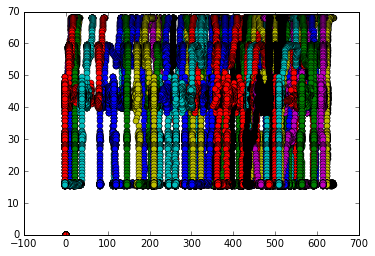

In [19]:
old_frame = BeeDanceVid[0]
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_RGB2GRAY)

optical_flow = []

until = len(BeeDanceVid)

TempCorners = Corners.copy()

X_c = np.zeros((until, len(TempCorners)))
Y_c = np.zeros((until, len(TempCorners)))

for i in range(1, until):
    frame_gray = cv2.cvtColor(BeeDanceVid[i], cv2.COLOR_RGB2GRAY)
    
    for j in range(0, len(TempCorners)):
        x = TempCorners[j,0]
        y = TempCorners[j,1]
        xr, yr = lucas_kanade(old_gray, frame_gray, x, y)
        TempCorners[j,0] += xr
        TempCorners[j,1] += yr
        X_c[i,j] = TempCorners[j,0]
        Y_c[i,j] = TempCorners[j,1]
        


#fig, ax = plt.subplots(1,1, figsize=(16,16))
#for i in range(0, len(TempCorners)):
for i in range(0, len(TempCorners)):
    x = X_c[:,i]
    y = Y_c[:,j]
    plt.plot(x,y, 'o')


#plt.axis('off')
plt.show()

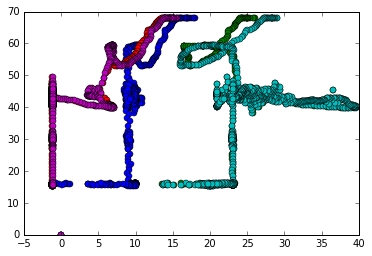

In [20]:
for i in range(0, 5):
    x = X_c[:,i]
    y = Y_c[:,j]
    plt.plot(x,y, 'o')


#plt.axis('off')
plt.show()